In [1]:
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

# Ambient state

In [2]:
from pycfd.reference.atmospheric_flow import stratification_profiles, saturation_calculation

ambient_stratification = stratification_profiles.Soong1973Dry()
T_e = lambda z: ambient_stratification.temp(z)
p_e = ambient_stratification.p

# Model integration

In [3]:
import odespy, numpy
from pyclouds import cloud_equations, plotting

In [4]:
g = ambient_stratification.g
R_d = ambient_stratification.gas_properties.R()
cp_d = ambient_stratification.gas_properties.cp()

environment = {'T_e': T_e, 'p_e': p_e, 'rho': ambient_stratification.rho, }
constants = {'R_d': R_d, 'cp_d': cp_d, 'g': g }

In [5]:
z_points = numpy.linspace(100., 4e3, 500)

w0 = 0.1
T0 = T_e(0.0) + 0.2
# p, r, w, T, q_v, q_r, q_l, q_i
initial_condition = [101325.0, 500.0, w0, T0, 0.00, 0., 0., 0.]

Integration stopped: vertical velocity dropped to zero
RKFehlberg terminated at t=967.535
Integration stopped: vertical velocity dropped to zero
RKFehlberg terminated at t=1022.24


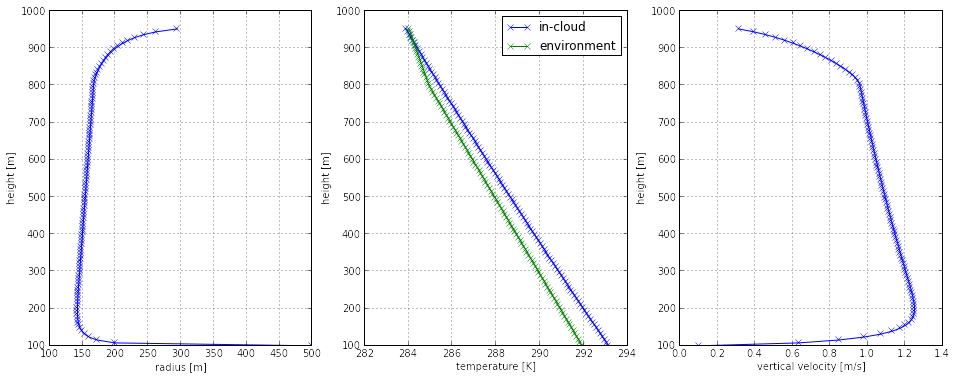

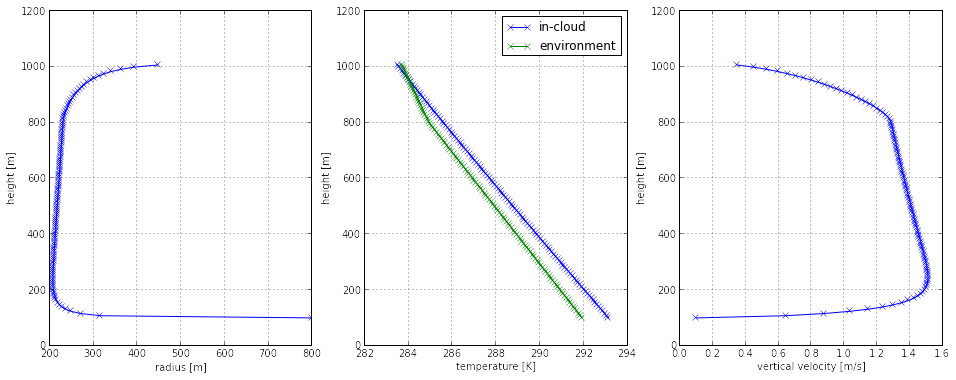

In [6]:
cloud_model = cloud_equations.DryAirOnly(environment=environment, constants=constants, D=2.)

initial_condition = [101325.0, 500.0, w0, T0, 0.00, 0., 0., 0.]
F_1, z_1 = cloud_model.integrate(initial_condition, z_points)
plotting.profile_plot(F_1, z_1, Te=T_e)

initial_condition = [101325.0, 800.0, w0, T0, 0.00, 0., 0., 0.]
F_2, z_2 = cloud_model.integrate(initial_condition, z_points)
plotting.profile_plot(F_2, z_2, Te=T_e)

In [7]:
cloud_model = cloud_equations.FullThermodynamicsCloudEquations(environment=environment, constants=constants, gamma=1.4, D=1.0, beta=0.2,)
F, z = cloud_model.integrate(initial_condition, z_points)
plotting.profile_plot(F, z, Te=T_e)

TypeError: 'float' object is not callable

In [ ]:
from pyclouds.cloud_equations import Var

def test_drag():    
    cloud_model = cloud_equations.DryAirOnly(environment=environment, constants=constants, D=1.0)
    F1, _ = cloud_model.integrate(initial_condition, z_points)

    cloud_model = cloud_equations.DryAirOnly(environment=environment, constants=constants, D=2.0)
    F2, _ = cloud_model.integrate(initial_condition, z_points)
    
    assert F1[:,Var.w].max() > F2[:,Var.w].max()
    
test_drag()